<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59019 entries, 0 to 59018
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      59019 non-null  object 
 1   StockCode    59019 non-null  object 
 2   Description  58704 non-null  object 
 3   Quantity     59019 non-null  int64  
 4   InvoiceDate  59019 non-null  object 
 5   Price        59018 non-null  float64
 6   Customer ID  41057 non-null  float64
 7   Country      59018 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


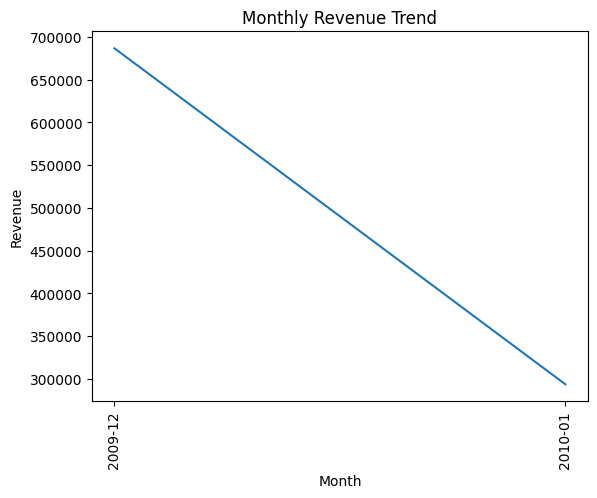

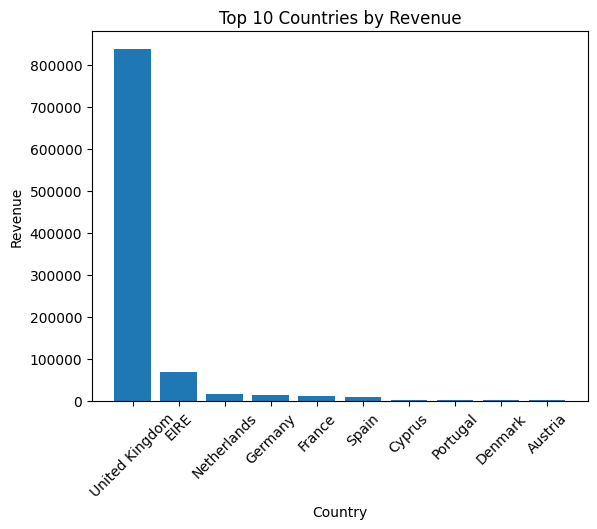

'\nKey Findings:\n\n1. The business generates significant revenue with a healthy Average Order Value (AOV),\n   indicating strong customer spending behaviour.\n\n2. Revenue shows clear seasonality with peaks toward year-end (Q4),\n   likely driven by festive and promotional periods.\n\n3. Revenue is highly concentrated in the United Kingdom, highlighting:\n   - Strong core market dominance\n   - Potential geographic concentration risk\n   - Opportunity for international growth diversification\n\n4. Repeat customers form the majority of the customer base and contribute\n   most of the revenue, indicating:\n   - Healthy retention\n   - Strong lifetime value potential\n   - Strategic importance of loyalty and CRM programs\n\nStrategic Recommendations:\n\n- Strengthen retention and loyalty initiatives to maximise repeat customer value\n- Reduce over-reliance on a single market by developing high-potential countries\n- Leverage seasonal peaks with targeted marketing and inventory planning\n

In [1]:
# ============================================================
# E-COMMERCE KPI PERFORMANCE ANALYSIS
# Role: Business Analyst (Consulting Style)
# Dataset: Online Retail Transactions
# File: ecommerce_transactions.csv
# ============================================================

# =========================
# 1. EXECUTIVE SUMMARY
# =========================
"""
This analysis evaluates the performance of an e-commerce business using
key commercial and customer KPIs. The objective is to understand:

1. Overall revenue and customer spending behaviour (AOV)
2. Monthly revenue trend and seasonality
3. Geographic concentration of revenue
4. Customer loyalty through repeat purchase analysis

The insights are intended to support strategic decision-making in:
- Growth planning
- Market prioritisation
- Customer retention strategy
"""

# =========================
# 2. IMPORT LIBRARIES
# =========================
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

# =========================
# 3. LOAD DATA
# =========================
df = pd.read_csv('/content/ecommerce_transactions.csv')

# Preview data
df.head()

# =========================
# 4. DATA UNDERSTANDING
# =========================
df.shape
df.info()
df.describe()

# =========================
# 5. DATA CLEANING
# =========================

# Remove rows with missing Customer ID
df = df.dropna(subset=['Customer ID'])

# Remove negative quantity (returns / cancellations)
df = df[df['Quantity'] > 0]

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['Price']

# =========================
# KPI 1: TOTAL REVENUE & AOV
# =========================

total_revenue = df['Revenue'].sum()
total_orders = df['Invoice'].nunique()
aov = total_revenue / total_orders

total_revenue, total_orders, aov

# =========================
# KPI 2: MONTHLY REVENUE TREND
# =========================

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue['InvoiceMonth'].astype(str), monthly_revenue['Revenue'])
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# =========================
# KPI 3: REVENUE BY COUNTRY
# =========================

country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()
country_revenue = country_revenue.sort_values(by='Revenue', ascending=False)

top10_countries = country_revenue.head(10)

plt.figure()
plt.bar(top10_countries['Country'], top10_countries['Revenue'])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

# =========================
# KPI 4: CUSTOMER SEGMENTATION (REPEAT VS ONE-TIME)
# =========================

customer_orders = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
customer_orders.columns = ['CustomerID', 'OrderCount']

customer_orders['CustomerType'] = customer_orders['OrderCount'].apply(
    lambda x: 'Repeat' if x > 1 else 'One-Time'
)

segment_count = customer_orders['CustomerType'].value_counts()

df = df.merge(customer_orders[['CustomerID', 'CustomerType']],
              left_on='Customer ID', right_on='CustomerID', how='left')

segment_revenue = df.groupby('CustomerType')['Revenue'].sum()

segment_count, segment_revenue

# =========================
# FINAL BUSINESS INSIGHTS
# =========================

"""
Key Findings:

1. The business generates significant revenue with a healthy Average Order Value (AOV),
   indicating strong customer spending behaviour.

2. Revenue shows clear seasonality with peaks toward year-end (Q4),
   likely driven by festive and promotional periods.

3. Revenue is highly concentrated in the United Kingdom, highlighting:
   - Strong core market dominance
   - Potential geographic concentration risk
   - Opportunity for international growth diversification

4. Repeat customers form the majority of the customer base and contribute
   most of the revenue, indicating:
   - Healthy retention
   - Strong lifetime value potential
   - Strategic importance of loyalty and CRM programs

Strategic Recommendations:

- Strengthen retention and loyalty initiatives to maximise repeat customer value
- Reduce over-reliance on a single market by developing high-potential countries
- Leverage seasonal peaks with targeted marketing and inventory planning
"""
